In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
from os import read
import pandas as pd
import math

In [5]:
def checkNotEmpty(input_array):
    for x in input_array:
        if float(x) > 0:
            return True
    return False

## Reading the files



In [27]:
results_dir = "../results/custom_normal/" # change me if necessary
window_size = 10 # change me if necessary

In [28]:

windows = []
for subdir, dirs, files in os.walk(results_dir):
    for dir in dirs:
        cache = []
        ipc = []
        window = []
        for filename in os.listdir(os.path.join(subdir, dir)):
            f = os.path.join(subdir, dir, filename)
            actualfile = open(f,'r')
            if (filename[:3] == "ipc"):
                ipc = actualfile.readlines()
            else:
                cache = actualfile.readlines()
        for x in range(window_size-len(ipc)):
            ipc.append('0')
        for x in range(window_size-len(cache)):
            cache.append('0')
        if (checkNotEmpty(cache) and checkNotEmpty(ipc)):
            for x in range(0, window_size):
                window.append(float(ipc[x]))
            for x in range(0, window_size):
                # let's normalize cache access to IPC
                window.append(float(cache[x])/1000000)
            windows.append(window)

Extracted 501 valid windows 



<AxesSubplot:>

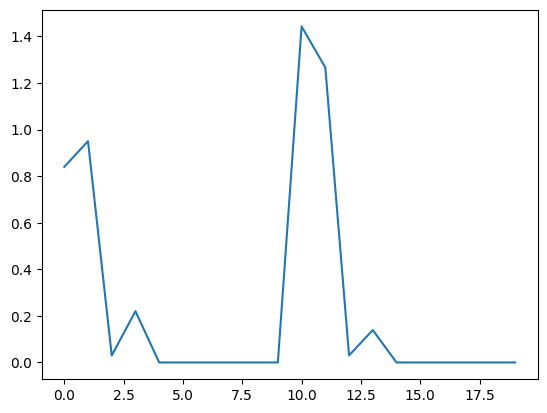

In [29]:
# Plotting a window for testing purposes
print("Extracted " + str(len(windows)) + " valid windows \n")
df = pd.Series(data=windows[22])
df.plot()

## Labeling

In [31]:

MODE = 'normal' # change this to 'attack' for attacker dataset
extra_name = 'eval_only' # add some extra name here if you want to differentiate files with the same mode
train_dir ='../training/' 

if not os.path.exists(train_dir):
    os.makedirs(train_dir)
outfile = open(train_dir + MODE + "_" + extra_name + ".csv", "w")

for c in range(window_size):
    outfile.write("ipc_" + str(c) + ",")
for c in range(window_size):
    outfile.write("cache_" + str(c) + ",")
outfile.write("verdict\n")

for x in  range(len(windows)):
    for y in range (len(windows[x])):
        outfile.write(str(windows[x][y]))
        outfile.write(",")
    if MODE == 'normal':
        outfile.write("1 \n")
    else:
         outfile.write("0 \n")